# Байесовская статистика: вывод оценки параметра экспоненциального распределения

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import scienceplots
from IPython.core.pylabtools import figsize
plt.style.use(['science', 'notebook', 'grid', 'ggplot'])

import numpy as np
import scipy.stats as stats

In [2]:
"02_Байесовская_статистика_вывод_для_оценок_параметра_експоненциального_распределения".replace("_"," ")

'02 Байесовская статистика вывод для оценок параметра експоненциального распределения'

Давайте теперь попробуем оценить параметры разных распределений, используя методы Байесовского вывода. К примеру, рассмотрим ситуацию в магазине, где клиенты приходят с интервалами времени, подчиняющимися экспоненциальному распределению $\sim exp(\lambda)$. Наша задача состоит в том, чтобы оценить значение параметра $\lambda$.

In [3]:
true_lambda = stats.uniform.rvs(loc=5, scale = 4)

data = stats.expon.rvs(scale = 1/ true_lambda, size = 20)

data

array([0.10718761, 0.18000286, 0.34090966, 0.1873024 , 0.12141601,
       0.16466627, 0.05894932, 0.10718729, 0.12118288, 0.17929823,
       0.08869871, 0.27783318, 0.2256445 , 0.17593764, 0.01489423,
       0.28613099, 0.12097891, 0.36430381, 0.00904437, 0.35108292])

Формула такая же:  
$P(\lambda|D) = \frac{P(D|\lambda)\cdot P(\lambda)}{P(D)}$  
Правдоподобие равно:  
$P(D|\lambda)=L(\lambda)=\prod\limits_{x\in D} \lambda e^{-\lambda x}$ 
За арпиорное для начала возьмем равномерное распределение на интервале $[0, 9]$

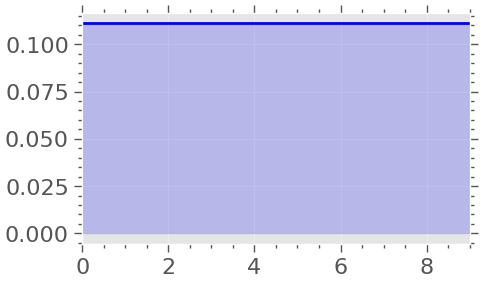

In [4]:
lambd = np.linspace(0.01,9, 1000)
P_lambda = stats.uniform.pdf(lambd, loc = 0, scale = 9)

def plot_continuous_dist(x, y, x_lim = (0, 9)):
    plt.figure(figsize=(5,3))
    plt.xlim(x_lim)
    plt.plot(x, y, color='blue')
    plt.fill_between(x, y, color='blue', alpha=0.2)
    plt.show()

plot_continuous_dist(lambd ,P_lambda)

К примеру к нам зашели 2 человека с интервалом 20/60 часа, пересчитаем наше апостериорное распределение согласно формулам выше:

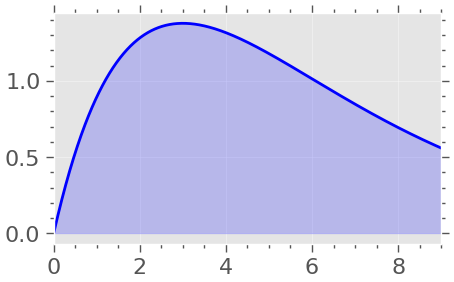

In [5]:
P_lambda = P_lambda*stats.expon.pdf(20/60, scale = 1/lambd) #P_lambda*lambd*np.exp(-lambd*1/6)
P_lambda /= np.sum(P_lambda)/lambd.size

plot_continuous_dist(lambd ,P_lambda)

Допустим зашел еще 1 человек с интервалом 30/60 часа после второго:

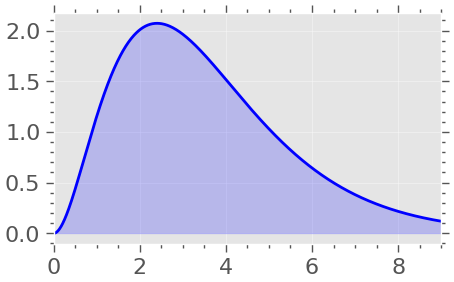

In [6]:
P_lambda = P_lambda*stats.expon.pdf(30/60, scale = 1/lambd)
P_lambda /= np.sum(P_lambda)/lambd.size

plot_continuous_dist(lambd ,P_lambda)

Промоделируем для 20 наблюдений:

In [7]:
def bayes_posterior(x, lambd, P_lambda):
    P_lambda = P_lambda*stats.expon.pdf(x, scale = 1/lambd)
    P_lambda /= np.sum(P_lambda)/lambd.size
    return P_lambda

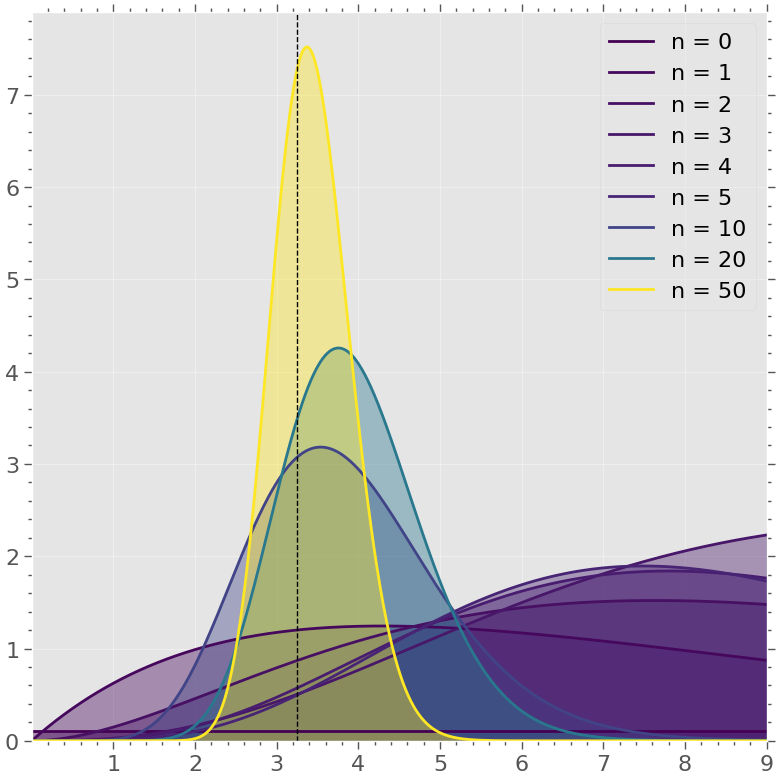

In [8]:
true_lambda = stats.uniform.rvs(scale = 9)
n_trials = [0, 1, 2, 3, 4, 5, 10, 20, 50]
data = stats.expon.rvs(scale = 1/true_lambda, size=n_trials[-1]+1)
lambd = np.linspace(0.01, 9, 1000)
P_lambda = stats.uniform.pdf(lambd, scale = 9)

plt.figure(figsize=(8, 8))
colors = plt.cm.viridis(np.linspace(0, 1, n_trials[-1]+1))  # Генерация цветов для каждого графика

for n, color in zip(range(n_trials[-1]+1), colors):
    if n in n_trials:
        plt.plot(lambd, P_lambda, label=f"n = {n}", color=color)
        plt.fill_between(lambd, 0, P_lambda, alpha=0.4, color=color)

    P_lambda = bayes_posterior(data[n], lambd, P_lambda)

plt.vlines(true_lambda, 0, plt.ylim()[1], color="k", linestyles="--", lw=1)
leg = plt.legend()
leg.get_frame().set_alpha(0.4)
plt.autoscale(tight=True)
plt.tight_layout()
plt.show()

Для того чтобы найти хорошее априорное семейство распределений посмотрим на теормеу Баеса:  

$P(\lambda|x) = \frac{P(x|\lambda) \cdot P(\lambda)}{P(x)}\propto P(x|\lambda) \cdot P(\lambda) \propto \lambda e^{-\lambda x} \cdot P(\lambda)$

Нам нужно подобрать такое распределение $P(\lambda)$ которое при умножении на $\lambda e^{\lambda x}$ остается в своем же семействе

значит оно должно выглядить как:  
$P(\lambda) \propto \lambda^\alpha \cdot e^{-\lambda \beta}$

После пересчета:  
$P(\lambda|x) = P(x|\lambda) \cdot P(\lambda) \propto \lambda e^{-\lambda x} \cdot \lambda^\alpha e^{-\lambda \beta} = \lambda^{\alpha+1} e^{-\lambda (\beta+x)}$  
$\alpha' = \alpha + 1, \beta' = \beta + x$

Такое априорное распределение называется [Гамма](https://ru.wikipedia.org/wiki/%D0%93%D0%B0%D0%BC%D0%BC%D0%B0-%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5)

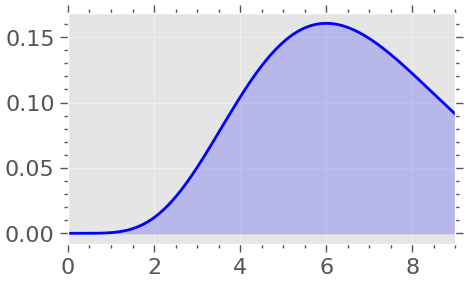

In [9]:
lambd = np.linspace(0.01, 9, 1000)
P_lambda = stats.gamma.pdf(lambd, a= 7, scale = 1)

plot_continuous_dist(lambd, P_lambda)

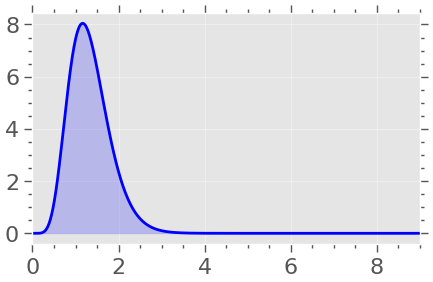

In [10]:
P_lambda = bayes_posterior(5, lambd, P_lambda)

plot_continuous_dist(lambd, P_lambda)

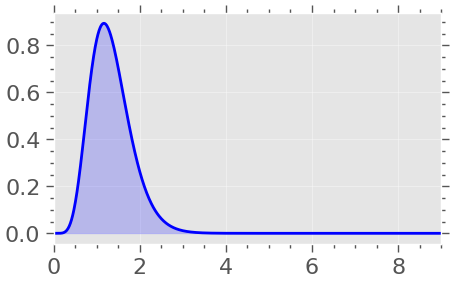

In [11]:
plot_continuous_dist(lambd,stats.gamma.pdf(lambd, a=7+1, scale = 1/(1+5)))

Значения плоности вероятности отличаются так как график $Gamma$ бесконечный, а я аппроксимировал его на отрезке $[0,9]$

Также одно из преимуществ баесовского подхода в том что после постоения оценок параметров, мы можем построить оценку самих данных:
$P(x) = \int \limits_\lambda P(x \cap \lambda) \delta\lambda = \int \limits_\lambda P(x|\lambda)P(\lambda) d\lambda$  
$P(x|\lambda) = \lambda e^{-\lambda x}$ наше правдоподобие, $P(\lambda)$ наше апосториорное распределение

In [12]:
# x = np.linspace(0.01, 9, 1000)
# x_dist = np.empty((0, len(x)))
# for l, P_l in zip(lambd, P_lambda):
#     current_x_dist = stats.expon.pdf(x, scale = 1/l)*P_l/x.size
#     x_dist = np.vstack([x_dist,current_x_dist])
# x_dist = x_dist.sum(axis=0)

# plot_continuous_dist(x,x_dist)

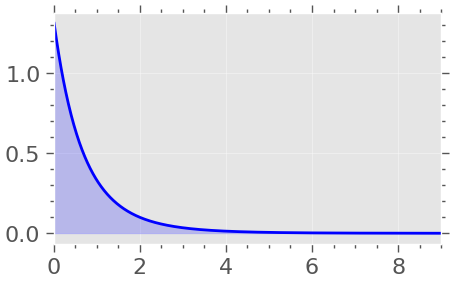

In [18]:
# Предполагаем, что lambd и P_lambda уже определены
x = np.linspace(0.01, 9, 1000)

# Вычисляем значения плотности экспоненциального распределения для каждого l в lambd
pdf_matrix = stats.expon.pdf(x[:, None], scale=1 / lambd) * P_lambda / x.size

# Суммируем по вертикали для интеграции
x_dist = pdf_matrix.sum(axis=1)

# Функция для построения графика, предполагаем, что она уже определена
plot_continuous_dist(x, x_dist)

Можно заметить что если интегрировать матрицу все возможных вероятностей $P(x \cap \lambda)$ __(pdf_matrix)__ по всем $x$ получаем обратно распределение для параметра $\lambda$ так как: $P(\lambda) = \int \limits_x P(x \cap \lambda) dx$

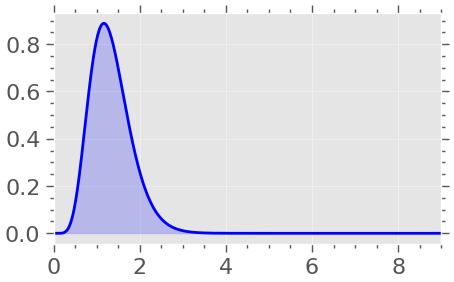

In [20]:
plot_continuous_dist(lambd, pdf_matrix.sum(axis=0))